### Visualisation of outlier classification

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
%store -r  X_test_labeled_df

In [3]:
save_plots = True

In [4]:
X_test_labeled_df.head()

,Analysis,Li7,Nd146,Pr141,La139,Ba137,Y89,Sr88,Rb85,As75,Ge72,Ga69,Zn68,Cu63,Fe56,Zr90,Cr52,B11,Mg24,Mn55,P31,S33,K39,Al27,Sc45,V51,inlierLabel
0,06_DH1_1,2.79,0.34,0.07,0.18,5.95,0.21,2.00,0.72000,0.44,1.37,0.69,20.75,11.14,35.38,1.43,5.18,93.21,27.83,3.27,35.07,806.55,443.100000,635.240000,1.08,0.51,1
1,07_DH1_2,2.37,0.24,0.06,0.19,7.51,0.21,1.84,0.77000,0.44,1.93,0.86,18.15,8.64,49.23,1.47,5.43,95.19,27.99,2.30,31.65,807.55,442.100000,639.090000,1.09,0.60,1
2,08_DH1_3,2.46,0.08,0.03,0.11,4.40,0.13,1.93,0.71000,0.42,2.14,0.79,17.54,3.44,16.46,1.16,2.61,93.63,26.43,1.40,25.43,837.73,444.280000,670.480000,1.17,0.62,1
3,09_DH2_1,18.47,0.25,0.06,0.23,12.48,0.20,4.29,1.62000,0.46,1.59,0.75,14.33,1.10,16.76,1.45,2.87,63.80,31.98,1.09,24.63,750.62,383.353245,620.245528,1.19,1.52,1
4,10_DH2_2,19.98,0.51,0.12,0.48,14.40,0.27,4.44,0.73562,0.43,0.81,0.76,14.59,1.23,62.16,1.99,5.92,60.96,44.95,1.26,22.59,796.21,383.353245,620.245528,1.22,2.44,1


## data preproccessing for dimensionality reduction and visualisation

In [5]:
element_data = X_test_labeled_df[X_test_labeled_df.columns.values[1:-1]]
element_data.head()

,Li7,Nd146,Pr141,La139,Ba137,Y89,Sr88,Rb85,As75,Ge72,Ga69,Zn68,Cu63,Fe56,Zr90,Cr52,B11,Mg24,Mn55,P31,S33,K39,Al27,Sc45,V51
0,2.79,0.34,0.07,0.18,5.95,0.21,2.00,0.72000,0.44,1.37,0.69,20.75,11.14,35.38,1.43,5.18,93.21,27.83,3.27,35.07,806.55,443.100000,635.240000,1.08,0.51
1,2.37,0.24,0.06,0.19,7.51,0.21,1.84,0.77000,0.44,1.93,0.86,18.15,8.64,49.23,1.47,5.43,95.19,27.99,2.30,31.65,807.55,442.100000,639.090000,1.09,0.60
2,2.46,0.08,0.03,0.11,4.40,0.13,1.93,0.71000,0.42,2.14,0.79,17.54,3.44,16.46,1.16,2.61,93.63,26.43,1.40,25.43,837.73,444.280000,670.480000,1.17,0.62
3,18.47,0.25,0.06,0.23,12.48,0.20,4.29,1.62000,0.46,1.59,0.75,14.33,1.10,16.76,1.45,2.87,63.80,31.98,1.09,24.63,750.62,383.353245,620.245528,1.19,1.52
4,19.98,0.51,0.12,0.48,14.40,0.27,4.44,0.73562,0.43,0.81,0.76,14.59,1.23,62.16,1.99,5.92,60.96,44.95,1.26,22.59,796.21,383.353245,620.245528,1.22,2.44


### features are standardised

In [6]:
my_scaler_train = StandardScaler()


In [7]:
element_data_scaled = my_scaler_train.fit_transform(element_data)


### T-Distributed Stochastic Neighbour Embedding is done 

In [8]:
my_tsne = TSNE(n_components=2, n_iter=5000, verbose=3).fit_transform(element_data_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 363 samples in 0.000s...
[t-SNE] Computed neighbors for 363 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 363 / 363
[t-SNE] Mean sigma: 1.818807
[t-SNE] Computed conditional probabilities in 0.019s
[t-SNE] Iteration 50: error = 65.2792511, gradient norm = 0.5205466 (50 iterations in 0.126s)
[t-SNE] Iteration 100: error = 66.7422180, gradient norm = 0.4899036 (50 iterations in 0.134s)
[t-SNE] Iteration 150: error = 67.0640488, gradient norm = 0.4959702 (50 iterations in 0.127s)
[t-SNE] Iteration 200: error = 65.8976440, gradient norm = 0.5025097 (50 iterations in 0.132s)
[t-SNE] Iteration 250: error = 66.6395798, gradient norm = 0.5047408 (50 iterations in 0.133s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.639580
[t-SNE] Iteration 300: error = 0.9361667, gradient norm = 0.0033486 (50 iterations in 0.104s)
[t-SNE] Iteration 350: error = 0.8233876, gradient norm = 0.0016921 (

### the t-SNE dimensions are put into a dataframe

In [9]:
tsne_df = pd.DataFrame(data = my_tsne, columns = ['tsne1', 'tsne2'])


### datasets are stored for the purpose of two-dimensional visualisations

In [10]:
tsne_data_with_colour = pd.concat([tsne_df, X_test_labeled_df['inlierLabel']], axis = 1)



In [11]:
tsne_data_with_colour.head()

,tsne1,tsne2,inlierLabel
0,-5.656645,-14.989763,1
1,-5.236604,-14.488330,1
2,-4.658259,-13.782083,1
3,-24.895775,-2.937426,1
4,-26.591963,-5.946535,1


### visualise t-SNE in two dimensions


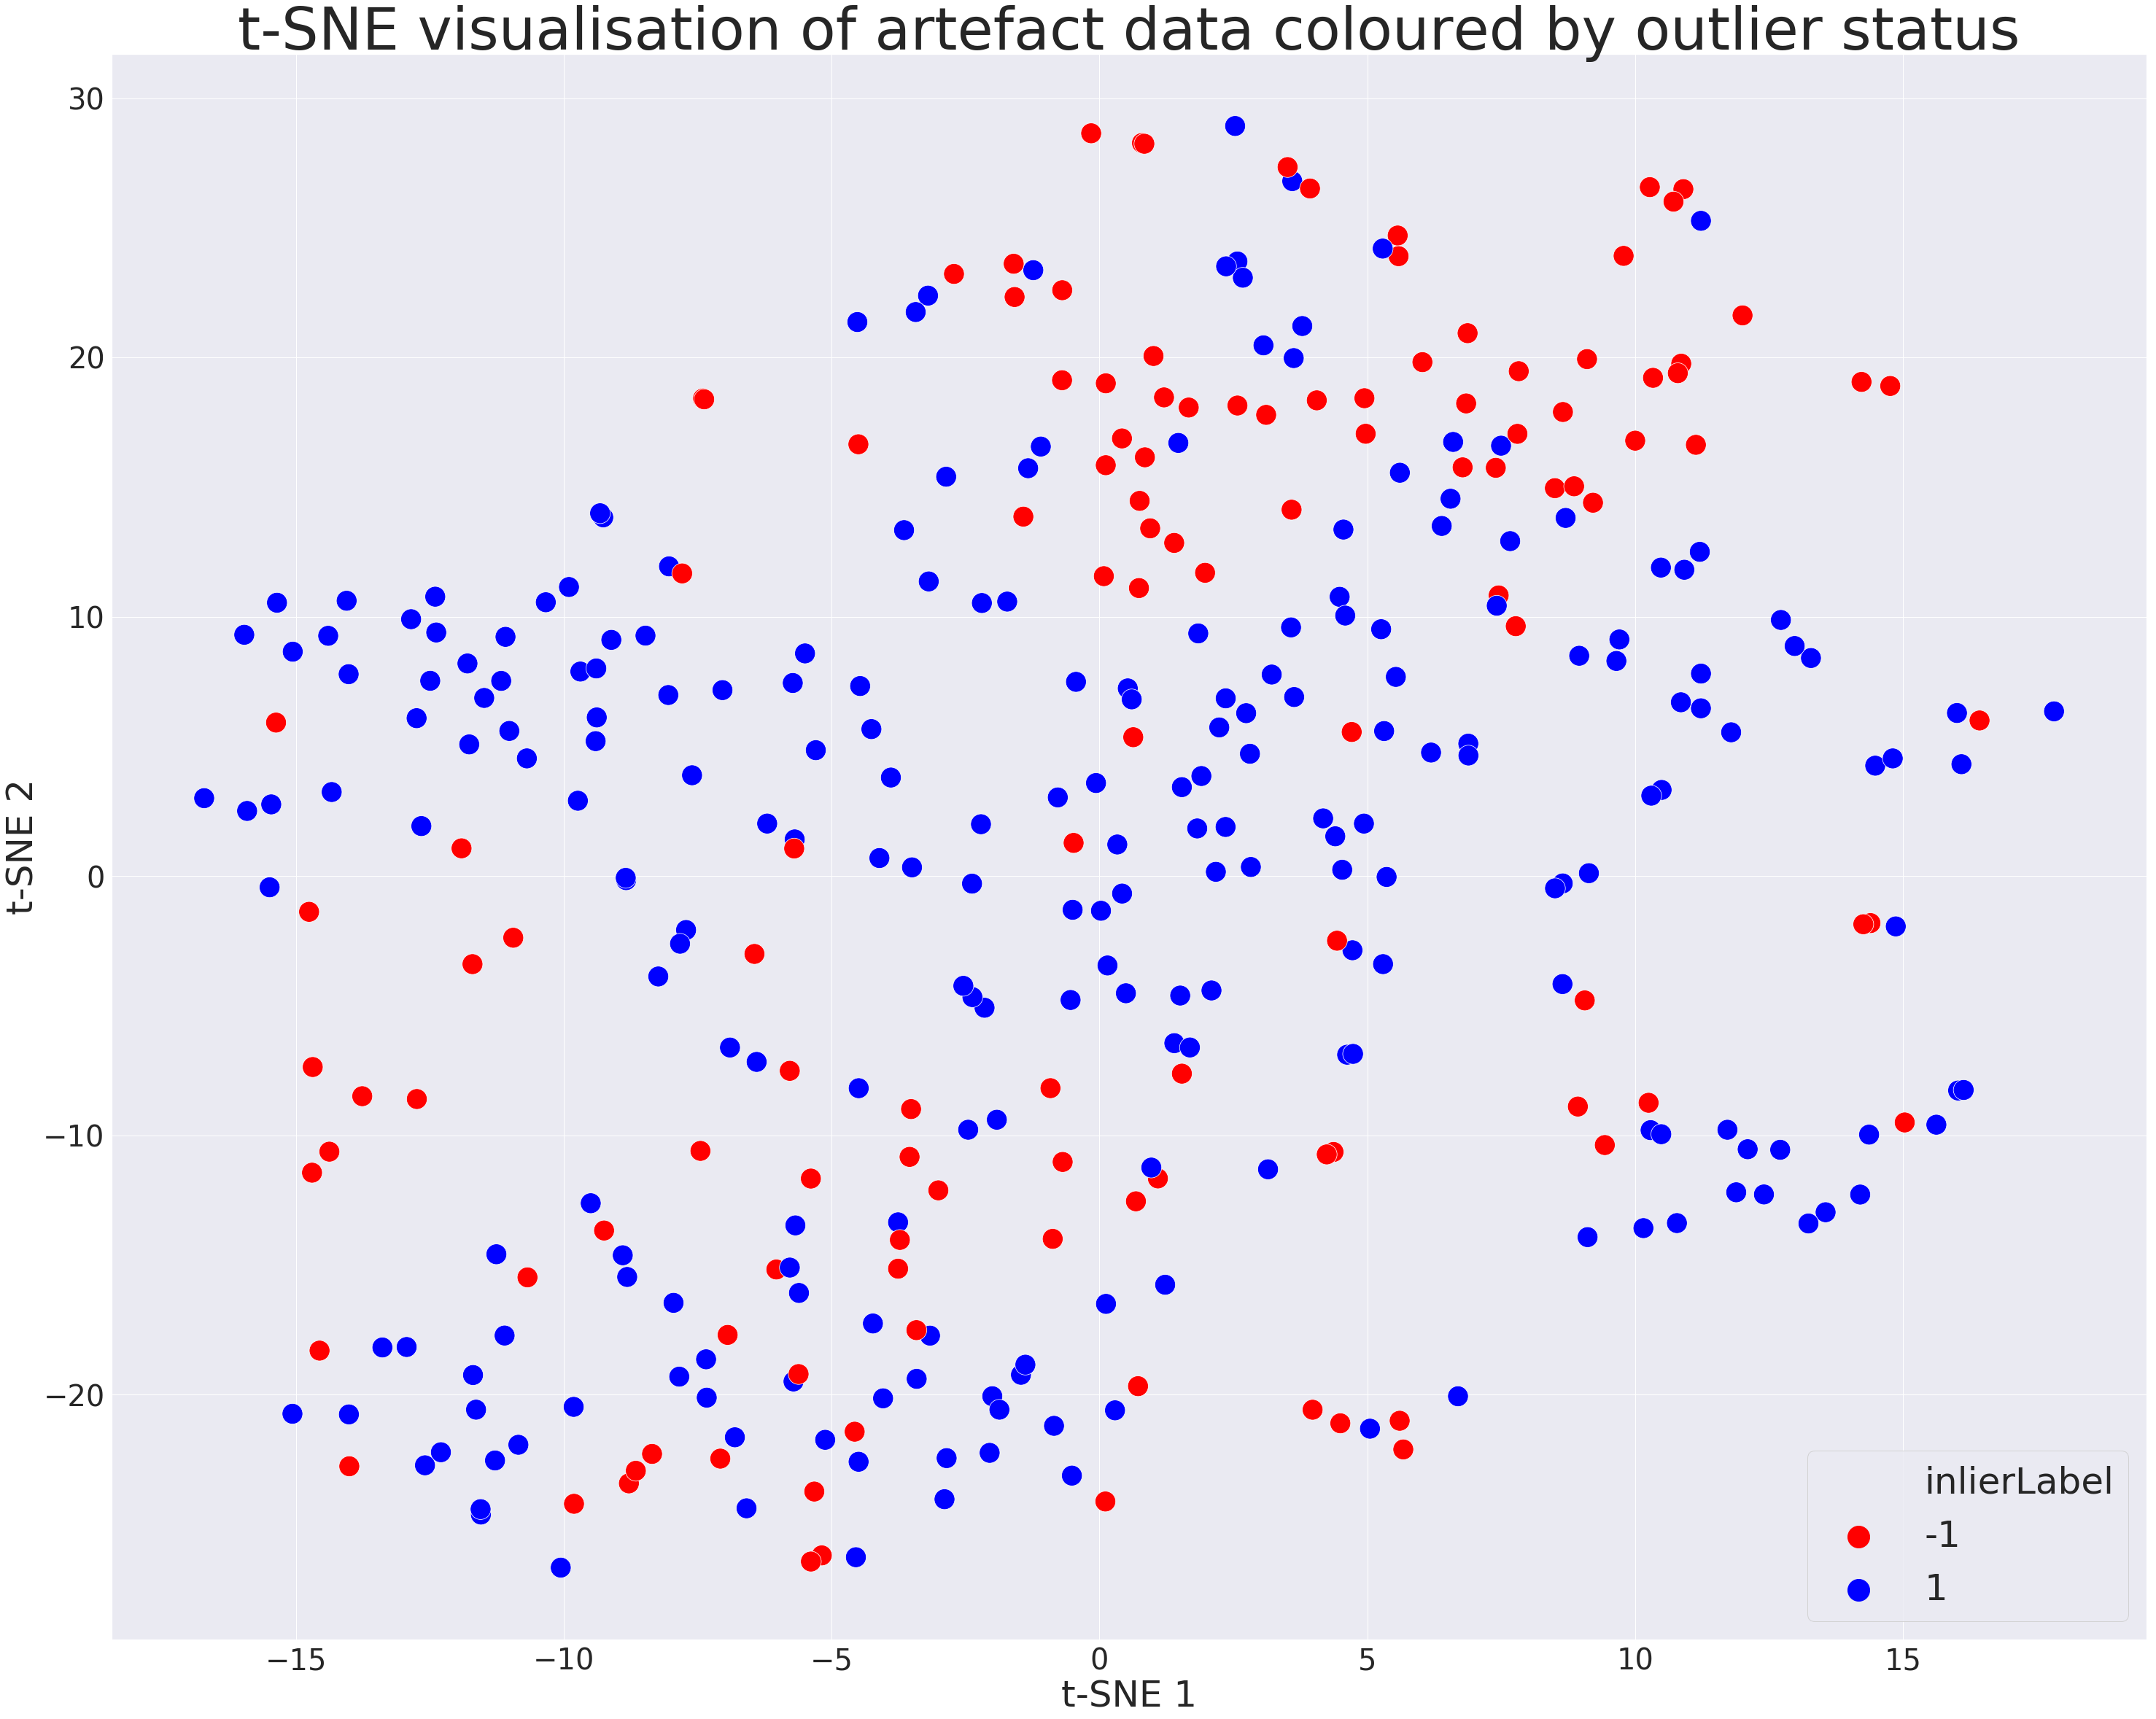

In [17]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.scatterplot(data = tsne_data_with_colour, x = 'tsne1', y = 'tsne2', hue='inlierLabel', s = 800, palette = ['red', 'blue'])
plt.title('test', fontsize=70)
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("t-SNE 2",fontsize=50)
plot.set_xlabel("t-SNE 1",fontsize=50)
plot.tick_params(labelsize=40)
plot.set_title('t-SNE visualisation of artefact data coloured by outlier status', fontdict = {'fontsize': 80})

plt.legend(fontsize = 50, loc = 4, markerscale = 5)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='figures/2d_tSNE')

In [13]:
tsne_data_with_colour.to_csv('output_datasets/tsne_outlier_data.csv')